Load & Inspect the Dataset

In [ ]:
import pandas as pd

# Load dataset
file_path = "/content/water_dataX_updated.csv"
df = pd.read_csv(file_path, encoding="latin1")

# Display first 5 rows
print("🔍 Preview of Dataset:")
print(df.head())

# Display column names
print("\n📝 Available Columns:", df.columns.tolist())


🔍 Preview of Dataset:
  STATION CODE                                          LOCATIONS  \
0         1393               DAMANGANGA AT D/S OF MADHUBAN, DAMAN   
1         1399  ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...   
2         1475                                ZUARI AT PANCHAWADI   
3         3181                        RIVER ZUARI AT BORIM BRIDGE   
4         3182                       RIVER ZUARI AT MARCAIM JETTY   

         STATE  Temp D.O. (mg/l)   PH CONDUCTIVITY (Âµmhos/cm) B.O.D. (mg/l)  \
0  DAMAN & DIU  30.6         6.7  7.5                      203           NAN   
1          GOA  29.8         5.7  7.2                      189             2   
2          GOA  29.5         6.3  6.9                      179           1.7   
3          GOA  29.7         5.8  6.9                       64           3.8   
4          GOA  29.5         5.8  7.3                       83           1.9   

  NITRATENAN N+ NITRITENANN (mg/l) FECAL COLIFORM (MPN/100ml)  \
0                

 DATA CLEANING

 Drop Unwanted Columns

In [ ]:
# Load dataset
df = pd.read_csv("water_dataX_updated.csv", encoding="latin1")

# Drop unwanted columns
df.drop(columns=["STATION CODE", "LOCATIONS", "STATE"], inplace=True)

# Display the first few rows
print("🔍 Preview of Dataset After Column Drop:")
print(df.head())
print("\n📝 Available Columns:", df.columns)

🔍 Preview of Dataset After Column Drop:
   Temp D.O. (mg/l)   PH CONDUCTIVITY (Âµmhos/cm) B.O.D. (mg/l)  \
0  30.6         6.7  7.5                      203           NAN   
1  29.8         5.7  7.2                      189             2   
2  29.5         6.3  6.9                      179           1.7   
3  29.7         5.8  6.9                       64           3.8   
4  29.5         5.8  7.3                       83           1.9   

  NITRATENAN N+ NITRITENANN (mg/l) FECAL COLIFORM (MPN/100ml)  \
0                              0.1                         11   
1                              0.2                       4953   
2                              0.1                       3243   
3                              0.5                       5382   
4                              0.4                       3428   

  TOTAL COLIFORM (MPN/100ml)Mean  year  
0                             27  2023  
1                           8391  2023  
2                           5330  2023  
3 

✅ Fix: Convert Columns to Numeric First


In [ ]:
# Convert all possible numeric columns to correct data type
df = df.apply(pd.to_numeric, errors='coerce')

# Now, fill missing values with the median of respective columns
df.fillna(df.median(), inplace=True)

print("✅ Missing values handled successfully!")


✅ Missing values handled successfully!


Handle Missing Values

In [ ]:
import numpy as np

# Convert blank spaces and "NAN" strings to actual NaN values
df.replace([" ", "NAN", "nan", ""], np.nan, inplace=True)

# Fill missing values with median of respective columns
df.fillna(df.median(), inplace=True)

print("✅ Missing values handled successfully!")


✅ Missing values handled successfully!


Convert Columns to Correct Data Types

In [ ]:
# Convert all columns to numeric (forcefully)
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")

print("✅ Data types converted successfully!")


✅ Data types converted successfully!


In [ ]:

# Rename column with a long name for convenience
df = df.rename(columns={
    "TOTAL COLIFORM (MPN/100ml)Mean": "Total_Coliform",
    "D.O. (mg/l)": "DO",
    "B.O.D. (mg/l)": "BOD",
    "CONDUCTIVITY (µmhos/cm)": "Conductivity",
    "NITRATENAN N+ NITRITENANN (mg/l)": "Nitrate_Nitrite",
    "FECAL COLIFORM (MPN/100ml)": "Fecal_Coliform"
})

df.head()


,Temp,DO,PH,CONDUCTIVITY (Âµmhos/cm),BOD,Nitrate_Nitrite,Fecal_Coliform,Total_Coliform,year
0,30.6,6.7,7.5,203.0,1.8965,0.1,11.0,27.0,2023
1,29.8,5.7,7.2,189.0,2.0000,0.2,4953.0,8391.0,2023
2,29.5,6.3,6.9,179.0,1.7000,0.1,3243.0,5330.0,2023
3,29.7,5.8,6.9,64.0,3.8000,0.5,5382.0,8443.0,2023
4,29.5,5.8,7.3,83.0,1.9000,0.4,3428.0,5500.0,2023


Visualizing Data Distributions

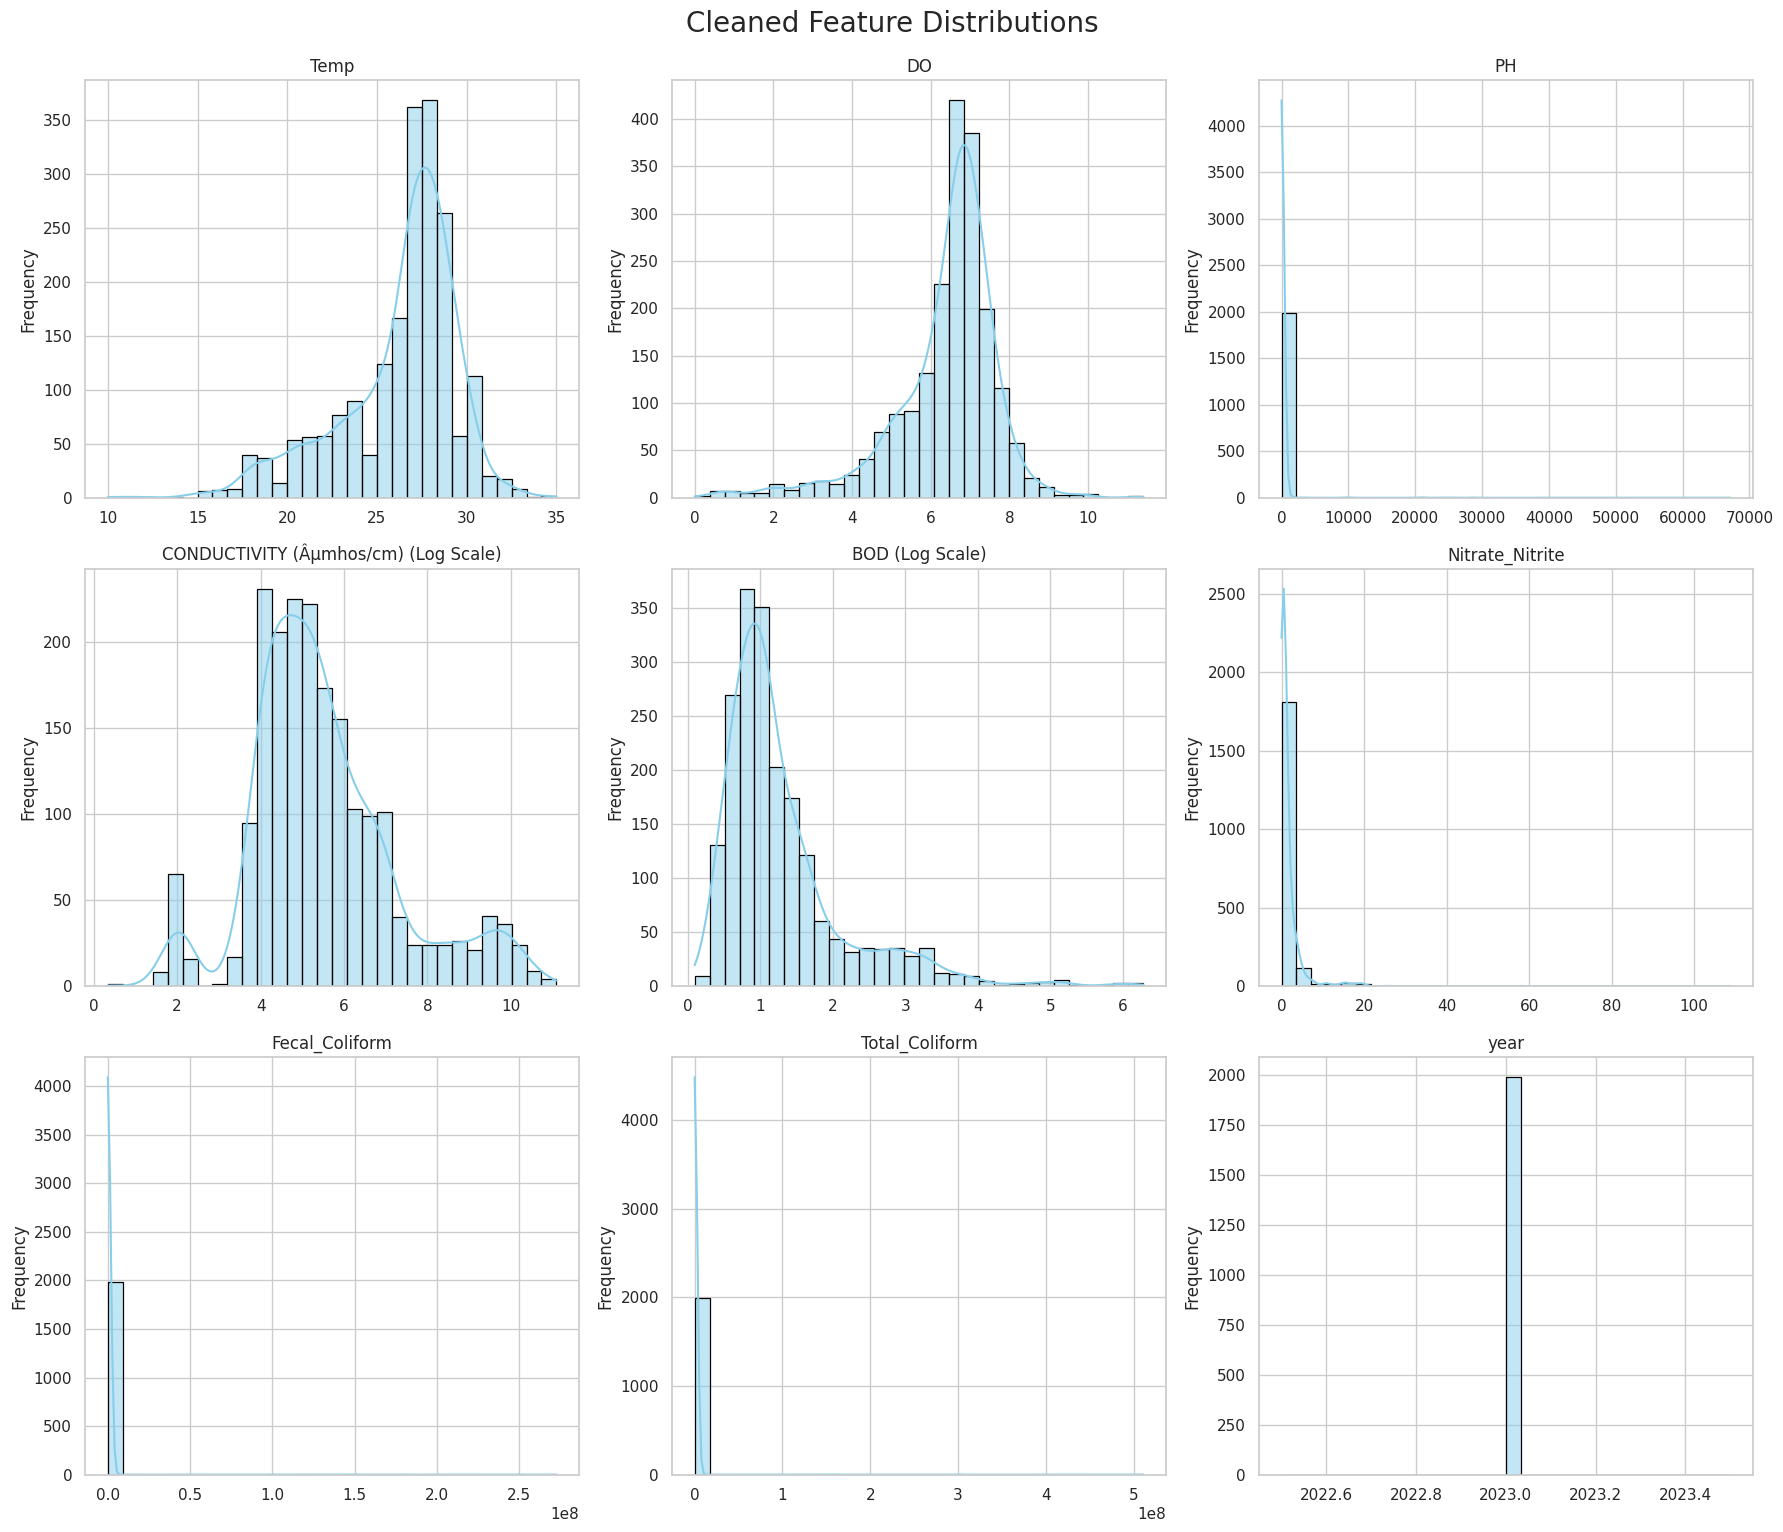

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Automatically get numeric columns only
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Plot setup
sns.set(style="whitegrid")
num_cols = 3
num_features = len(numeric_cols)
num_rows = (num_features + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    ax = axes[idx]
    data = df[col].dropna()

    # Apply log scale if positively skewed
    if (data > 0).all() and data.skew() > 2:
        data = np.log1p(data)
        ax.set_title(f"{col} (Log Scale)")
    else:
        ax.set_title(col)

    sns.histplot(data, bins=30, kde=True, ax=ax, color="skyblue", edgecolor="black")
    ax.set_xlabel("")
    ax.set_ylabel("Frequency")

# Remove any extra axes
for j in range(num_features, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Cleaned Feature Distributions", fontsize=20, y=1.02)
plt.show()


Save Cleaned Data

In [ ]:
# Save cleaned dataset
df.to_csv("cleaned_water_data.csv", index=False)

print("✅ Data Cleaning Completed! Cleaned dataset saved as 'cleaned_water_data.csv'.")


✅ Data Cleaning Completed! Cleaned dataset saved as 'cleaned_water_data.csv'.


Handle Categorical Features

In [ ]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)

# Convert categorical variables using one-hot encoding (if needed)
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("✅ Categorical Features Encoded!")


Categorical Columns: Index([], dtype='object')
✅ Categorical Features Encoded!


Select Relevant Features

Handle Missing Values


In [ ]:
# Check missing values
print("Missing values before handling:\n", df.isnull().sum())

# Fill missing values (Choose a strategy)
df.fillna(df.median(), inplace=True)  # Filling with median for robustness

print("✅ Missing Values Handled!")


Missing values before handling:
 Temp                        0
DO                          0
PH                          0
CONDUCTIVITY (Âµmhos/cm)    0
BOD                         0
Nitrate_Nitrite             0
Fecal_Coliform              0
Total_Coliform              0
year                        0
dtype: int64
✅ Missing Values Handled!


Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Scale numerical features
df[df.columns] = scaler.fit_transform(df)

print("✅ Feature Scaling Done!")


✅ Feature Scaling Done!


Feature Engineering

Load the Cleaned Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score

# Load dataset
df = pd.read_csv("/content/cleaned_water_data.csv")

# Check first few rows
print(df.head())


   Temp   DO   PH  CONDUCTIVITY (Âµmhos/cm)     BOD  Nitrate_Nitrite  \
0  30.6  6.7  7.5                     203.0  1.8965              0.1   
1  29.8  5.7  7.2                     189.0  2.0000              0.2   
2  29.5  6.3  6.9                     179.0  1.7000              0.1   
3  29.7  5.8  6.9                      64.0  3.8000              0.5   
4  29.5  5.8  7.3                      83.0  1.9000              0.4   

   Fecal_Coliform  Total_Coliform  year  
0            11.0            27.0  2023  
1          4953.0          8391.0  2023  
2          3243.0          5330.0  2023  
3          5382.0          8443.0  2023  
4          3428.0          5500.0  2023  


Feature Correlation Analysis

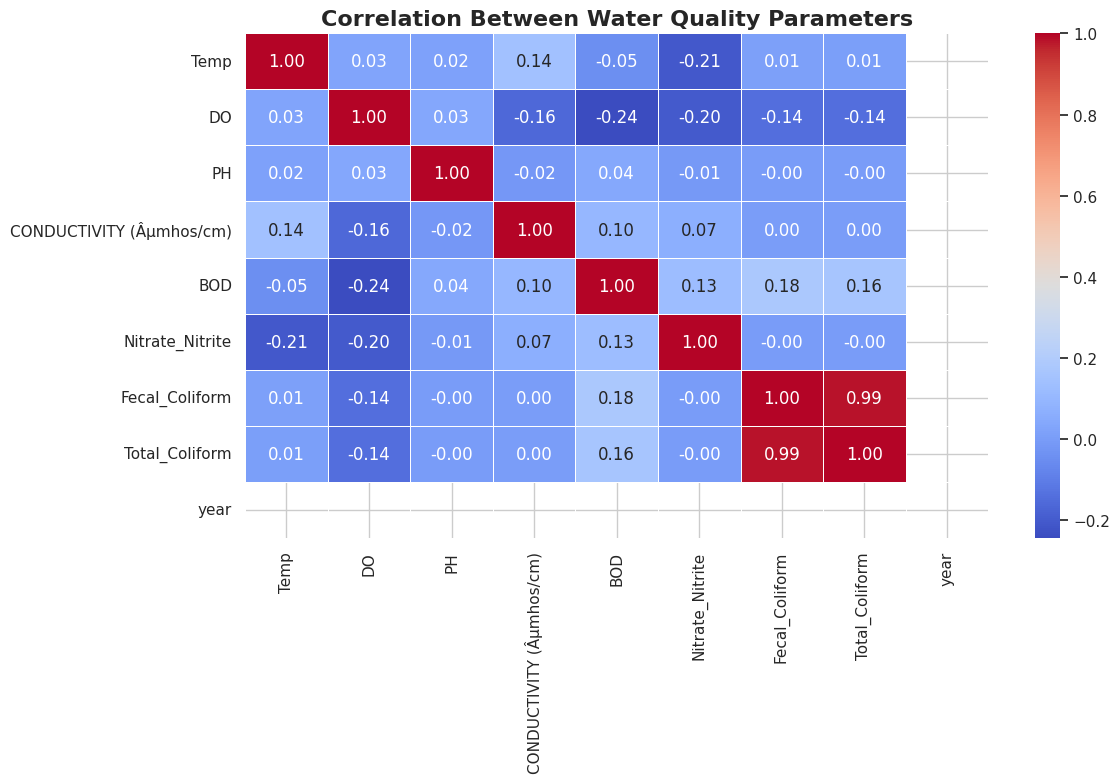

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix with numeric columns only
corr = df.select_dtypes(include='number').corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Between Water Quality Parameters", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


Principal Component Analysis (PCA)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("/content/cleaned_water_data.csv")

# Check available columns
print("Columns in DataFrame:", df.columns)

# Select only numerical columns
numeric_df = df.select_dtypes(include=["number"])

# Standardize numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_df)

print("✅ Standardization Completed!")


Columns in DataFrame: Index(['Temp', 'DO', 'PH', 'CONDUCTIVITY (Âµmhos/cm)', 'BOD',
       'Nitrate_Nitrite', 'Fecal_Coliform', 'Total_Coliform', 'year'],
      dtype='object')
✅ Standardization Completed!


Feature Selection

# Check available columns
print("Available Columns:", df.columns)

# Define target variable (example: predicting B.O.D. levels)
target = "B.O.D. (mg/l)"

# List of columns to drop
drop_cols = ["year", "STATION CODE", "LOCATIONS", "STATE", target]

# Drop only existing columns
existing_cols = [col for col in drop_cols if col in df.columns]

# Define feature matrix (X) and target variable (y)
X = df.drop(columns=existing_cols, errors="ignore")  # Ignore missing columns
y = df[target]

print("✅ Features and target variable successfully extracted!")


Train Regression Models

Since we are predicting B.O.D. (mg/l), a continuous value, we need Regression Models.



Import Libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


Data Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Set features and target
X = df.drop("BOD", axis=1)
y = df["BOD"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Train & Evaluate Models

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Machine": SVR()
}

# Train & evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)  # Train model
    y_pred = model.predict(X_test_scaled)  # Make predictions




Hyperparameter Tuning for Random Forest


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Perform Randomized Search Cross Validation
tuner = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                           n_iter=20, cv=5, verbose=2, n_jobs=-1, random_state=42)

tuner.fit(X_train, y_train)

# Best parameters & model
best_params = tuner.best_params_
best_model = tuner.best_estimator_

print("🔥 Best Parameters Found:", best_params)

# Evaluate the tuned model
y_pred_tuned = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_tuned)
mse = mean_squared_error(y_test, y_pred_tuned)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_tuned)

print(f"\n🚀 Tuned Random Forest Performance:")
print(f"MAE (MEAN ABSOLUTE ERROR): {r2:.3f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
🔥 Best Parameters Found: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10}

🚀 Tuned Random Forest Performance:
MAE (MEAN ABSOLUTE ERROR): 0.116


 Retrain & Store the Model Properly


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest Again
best_rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
best_rf_model.fit(X_train, y_train)

print("✅ Random Forest Model Trained & Stored!")

✅ Random Forest Model Trained & Stored!


Deploy the model & save it for real-world use

Save the Trained Model



In [ ]:
import joblib

# Save the trained model
joblib.dump(best_rf_model, "water_quality_model.pkl")

print("✅ Model saved successfully as 'water_quality_model.pkl'!")


✅ Model saved successfully as 'water_quality_model.pkl'!
